In [5]:
import pandas as pd
import numpy as np
import talib
from datetime import datetime
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import statsmodels.api as sm
import pykalman as pkl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif']=['Microsoft Yahei']
plt.style.use("ggplot")

<div class="jumbotron">
    <p class="display-1 h1">量化交易策略与模型</p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 交易基础

## 交易操作

<dl class="row text-info">
    <dt class="col-md-2">开仓</dt>
    <dd class="col-md-10">交易者<strong>新</strong>买入或<strong>新</strong>卖出一定数量的交易标的</dd>
</dl>

- 例如，以3500元/吨的价格在期货市场上卖出10手rb2101合约

<dl class="row text-danger">
    <dt class="col-md-2">平仓</dt>
    <dd class="col-md-10">交易者通过<strong>笔数相等</strong>、<strong>方向相反</strong>的交易来对冲原来持有的交易标的的过程</dd>
</dl>

- 以3500元/吨的价格在期货市场上卖出10手rb2101合约，则须在2021年1月之前**买进10手**该月份合约对冲平仓

<dl class="row">
    <dt class="col-md-2">持仓</dt>
    <dd class="col-md-10">开仓之后尚没有平仓的交易标的，是交易者持有交易标的的过程</dd>
</dl>

- 多头头寸：**买入**交易标的后持有的头寸，也被称为***多头***

- 空头头寸：**卖出**交易标的后持有的头寸，也被称为***空头***

## 交易量

<dl class="row text-info">
    <dt class="col-md-2">成交量</dt>
    <dd class="col-md-10">在一个交易时段内买卖某种交易标的的数量</dd>
</dl>

<dl class="row text-danger">
    <dt class="col-md-2">持仓量</dt>
    <dd class="col-md-10">所有投资者持仓的总数，是所有多头与空头数之和</dd>
</dl>

## 价格

### 形态描述类价格

- 开盘价：某一交易标的在某一时间段内**第一笔**成交的价格
- 收盘价：某一交易标的在某一时间段内**最后一笔**成交的价格
- 最高价：某一交易标的在某一时间段内成交的**最高**价格
- 最低价：某一交易标的在某一时间段内成交的**最低**价格

#### 时间长度

- 不同的时间长度对应着不同长度的趋势
    - 例如，1分钟、5分钟、15分钟、1小时、1天、1周、1月、半年、1年等

<center><img src="./img/tradingBasics/timescale.jpg" width=100%></center>

#### K线图(candlestick)

- 选取一个时间长度，然后用该时间长度内的**开盘价、收盘价、最高价、最低价**构成的图形

<center><img src="./img/tradingBasics/candlestick.png" width=70%></center>

# 量化交易策略及交易系统

## 量化交易策略组成

<dl class="row text-danger">
    <dt class="col-md-4">交易策略</dt>
    <dd class="col-md-8">交易策略是交易员进行交易时遵循的交易规则</dd>
</dl>

<center><img src="./img/strategy/strategyComp.png" width=100%></center>

## 量化交易系统

- 量化交易系统由**量化交易模型**驱动

<center><img src="./img/models/tradingSystem.png" width=100%></center>

- 数据模型
    - 数据的获取、存储、处理等

- Alpha模型
    - 决定入场、离场的时机

- 风险控制模型
    - 控制损失

- 交易成本模型
    - 估计交易成本（交易手续费等）与收益

- 投资组合模型
    - 决定希望持有的品种与头寸规模

- 交易执行模型
    - 有效率、低成本的执行买卖交易指令

# 数据模型

> 数据是量化交易模型的基础

## 数据类型

<center><img src="./img/models/dataType.png" width=100%></center>

## 数据的获取

### 从第三方终端获取数据

- 典型平台
    - Wind数据库
    - [TuShare https://tushare.pro/](https://tushare.pro/)
        - 注册获得token
    - [JointQuant https://www.joinquant.com/](https://www.joinquant.com/)
        - 注册获得一年的免费使用权限
    - [BaoStock http://baostock.com/baostock/index.php/首页](http://baostock.com/baostock/index.php/首页)
    - [AKShare https://www.akshare.xyz/](https://www.akshare.xyz/)

- 优缺点：
    - 优点：数据经过加工处理
    - 缺点：速度慢

### 从交易所获取数据

- 典型接口
    - 交易接口CTP（Comprehensive Transaction Platform）[http://www.sfit.com.cn/](http://www.sfit.com.cn/)
    - 基于CTP的`Python`量化框架：[vn.py https://www.vnpy.com/](https://www.vnpy.com/)

- 优缺点：
    - 优点：速度快、原始数据
    - 缺点：需要自己学习接口使用，清理数据

# Alpha模型

<dl class="row">
    <dt class="col-md-3">Alpha</dt>
    <dd class="col-md-9">新的非相关风险调整的回报</dd>

- 特点
    - 难于发现
    - 一旦被广泛知道，就会逐渐成为一种风险因素，失去风险调整的营利性

<center><img src="./img/models/alphaModels.png" width=100%></center>

## 趋势追踪模型

- 在趋势初期入场，在趋势末期离场

- 技术指标是识别趋势的重要方法

> 基于价格、成交量、持仓量等的历史数据而构建的启发式或数学计算指标


- [https://www.visualcapitalist.com/12-types-technical-indicators-stocks/](https://www.visualcapitalist.com/12-types-technical-indicators-stocks/)
- [https://www.theforexchronicles.com/the-4-different-types-of-technical-indicators-that-you-can-use/](https://www.theforexchronicles.com/the-4-different-types-of-technical-indicators-that-you-can-use/)

## 均值回归模型

<div class="row">
    <div class="col-md-6">
        <img src="./img/models/trend.jpg" width=90%>
    </div>
    <div class="col-md-6">
        <img src="./img/models/arbitrage.jpg" width=90%>
    </div>
</div>

- 理论基础
    > 标的资产的价格总是围绕着其内在价值波动，一旦趋势结束，价格必然出现反方向运动，回到价值附近

- 常用的实现方式
    > 配对交易（套利）

- 原因
    - 单一资产的内在价值较难确定
    - 对于两个高度相关资产，一种资产的价格就可以近似成为另一种资产的内在价值

### 协整分析

平稳（时间）序列是包括均值、方差和自相关等在内的统计特性不随时间发生变化的时间序列。
非平稳序列数据可能包含趋势（trend）、季节性（seasonality)，或者随机游走（random walk）。
随机游走是一种随机过程，每个时刻的数据只跟前一个数据和各自的随机误差有关。
几乎所有的原始价格时间序列数据都是非平稳的。

<dl class="row">
    <dt class="col-md-4">协整(cointegration)</dt>
    <dd class="col-md-8">两个时间序列各自都是<strong>非平稳过程</strong>，但是它们的线性组合是<strong>平稳过程</strong></dd>
</dl>

<dl class="row">
    <dt class="col-md-4">平稳过程</dt>
    <dd class="col-md-8">统计特性在时间平移下不变的随机过程</dd>
</dl>

- 假设有一个时间序列$\{X_t\}$，则该序列是平稳过程需要满足下面的条件：


1. $E[X_t] = \mu$
2. $Var[X_t] = \sigma^2$
3. $Cov(X_t, X_{t+k}) = r(k)$

<center><img src="./img/strategy/stationary.png" width=60%></center>

##### 检验协整关系

- 设有两个非平稳的时间序列$\{X_t\}$ 和 $\{Y_t\}$均是1阶单整,


1. 利用最小二乘（OLS）法估计$X_t$ 和 $Y_t$ 的长期均衡关系式$Y_t=\beta_0+\beta_1X_t+e_t$，并计算误差：
\begin{align}
  \hat{Y}_t &= \hat{\beta}_0 + \hat{\beta}_1 X_t \\
  \hat{e}_t &= Y_t - \hat{Y}_t \\
\end{align}

2. 检验残差序列$\{\hat{e}_t\}$的平稳性。可用ADF(Augmented Dickey-Fuller)检验，如果通过检验，说明$X_t$ 和 $Y_t$具有协整关系。

- $\beta_1$：hedging ratio

### 统计套利

```python
pip install statsmodels
import statsmodels.api as sm
```

#### 单个时间序列平稳性检验

```python
    adfres = sm.tsa.stattools.adfuller(x)
```
- `x`：需要检验的时间序列
- `adfres[0]`：检验的统计量值
- `adfres[1]`：pvalue，显著性水平
- `adfres[4]`：临界值，字典类型，键分别是1%、5%、10%

- ADF原假设：时间序列是**非平稳的**

In [64]:
def conint_test(a_name,b_name):
    adf = pd.read_csv(f'./data/{a_name}.csv',parse_dates=True,index_col=0)
    print(adf)
    adf.columns = ['open','high','low','close','volume','openinterest','adj']
    bdf = pd.read_csv(f'./data/{b_name}.csv',parse_dates=True,index_col=0)
    bdf.columns = ['open','high','low','close','volume','openinterest','adj']
    newdf = adf.merge(bdf,how='inner',left_index=True,right_index=True)
    print(newdf)
    newdf.dropna(inplace=True)
    coint_t,pvalue,crit_val = sm.tsa.stattools.coint(newdf['close_x'], newdf['close_y'])
    print(f"统计量 {coint_t:.3f}\n p值 {pvalue:.3f}\n 1%临界值 {crit_val[0]:.3f}\n 5%临界值 {crit_val[1]:.3f}\n 10%临界值 {crit_val[2]:.3f}")

In [65]:
conint_test('zccontinuous','icontinuous')

              开盘价    最高价    最低价    收盘价    成交量    持仓量  动态结算价
日期                                                         
2015-05-26  430.0  432.0  422.0  423.4  38646  38146  427.0
2015-05-27  423.0  425.0  421.0  422.0  20592  38938  422.4
2015-05-28  423.0  428.0  422.0  424.8  18854  37494  425.0
2015-05-29  426.0  427.0  423.0  425.4  10500  36478  425.0
2015-06-01  428.0  429.0  424.8  428.0  15876  36372  427.0
...           ...    ...    ...    ...    ...    ...    ...
2021-11-02  900.0  939.8  841.0  891.8  56319  32665  898.4
2021-11-03  872.0  987.8  872.0  978.0  46625  27882  933.6
2021-11-04  999.8  999.8  903.0  934.4  33592  26186  940.2
2021-11-05  935.0  977.0  930.2  945.2  17281  24615  948.4
2021-11-08  955.0  985.0  910.0  916.2  21044  23428  941.0

[1568 rows x 7 columns]
            open_x  high_x  low_x  close_x  volume_x  openinterest_x  adj_x  \
日期                                                                            
2015-05-26   430.0   432.0  422.0    

In [6]:
zcdf = pd.read_csv('./data/zccontinuous.csv',parse_dates=True,index_col=0)
zcdf.columns = ['open','high','low','close','volume','openinterest','adj']
zcdf

,open,high,low,close,volume,openinterest,adj
日期,,,,,,,
2015-05-26,430.0,432.0,422.0,423.4,38646,38146,427.0
2015-05-27,423.0,425.0,421.0,422.0,20592,38938,422.4
2015-05-28,423.0,428.0,422.0,424.8,18854,37494,425.0
2015-05-29,426.0,427.0,423.0,425.4,10500,36478,425.0
2015-06-01,428.0,429.0,424.8,428.0,15876,36372,427.0
...,...,...,...,...,...,...,...
2021-11-02,900.0,939.8,841.0,891.8,56319,32665,898.4
2021-11-03,872.0,987.8,872.0,978.0,46625,27882,933.6
2021-11-04,999.8,999.8,903.0,934.4,33592,26186,940.2


In [7]:
jdf = pd.read_csv('./data/jcontinuous.csv',parse_dates=True,index_col=0)
jdf.columns = ['open','high','low','close','volume','openinterest','adj']
jdf

,open,high,low,close,volume,openinterest,adj
日期,,,,,,,
2011-04-15,2300.0,2300.0,2226.0,2247.0,57134,6404,2255.0
2011-04-18,2233.0,2388.0,2233.0,2381.0,132702,19488,2344.0
2011-04-19,2375.0,2384.0,2320.0,2336.0,204462,23270,2344.0
2011-04-20,2350.0,2395.0,2328.0,2343.0,175506,23484,2352.0
2011-04-21,2353.0,2363.0,2323.0,2335.0,97576,22246,2346.0
...,...,...,...,...,...,...,...
2021-11-02,2917.5,3115.5,2785.0,3001.0,68098,35261,2977.5
2021-11-03,2996.5,3260.0,2966.0,3215.0,50071,34290,3115.5
2021-11-04,3210.0,3250.0,2981.5,3034.5,41184,32511,3106.0


In [28]:
newdf = zcdf.merge(jdf,how='inner',left_index=True,right_index=True)
newdf

,open_x,high_x,low_x,close_x,volume_x,openinterest_x,adj_x,open_y,high_y,low_y,close_y,volume_y,openinterest_y,adj_y
日期,,,,,,,,,,,,,,
2015-05-26,430.0,432.0,422.0,423.4,38646,38146,427.0,909.0,921.0,908.0,909.5,281984,173064,915.0
2015-05-27,423.0,425.0,421.0,422.0,20592,38938,422.4,909.0,916.0,909.0,913.0,118972,164456,913.0
2015-05-28,423.0,428.0,422.0,424.8,18854,37494,425.0,913.0,916.0,908.5,914.5,123038,157200,913.0
2015-05-29,426.0,427.0,423.0,425.4,10500,36478,425.0,913.5,916.0,909.0,915.5,165124,157164,913.0
2015-06-01,428.0,429.0,424.8,428.0,15876,36372,427.0,916.0,928.0,915.0,923.0,259246,165998,921.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-02,900.0,939.8,841.0,891.8,56319,32665,898.4,2917.5,3115.5,2785.0,3001.0,68098,35261,2977.5
2021-11-03,872.0,987.8,872.0,978.0,46625,27882,933.6,2996.5,3260.0,2966.0,3215.0,50071,34290,3115.5
2021-11-04,999.8,999.8,903.0,934.4,33592,26186,940.2,3210.0,3250.0,2981.5,3034.5,41184,32511,3106.0


In [29]:
newzcdf = newdf.loc[:,['open_x','high_x','low_x','close_x']]
newjdf = newdf.loc[:,['open_y','high_y','low_y','close_y']]
newzcdf.columns = ['open','high','low','close']
newjdf.columns = ['open','high','low','close']

In [3]:
retAapl = web.DataReader('AAPL',start='2018-1-1',end='2020-11-20',data_source='yahoo')
retAapl.head()
retGoog = web.DataReader('GOOG',start='2018-1-1',end='2020-11-20',data_source='yahoo')
retGoog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.105534
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.098373
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.289268
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.759361
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.604263


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941


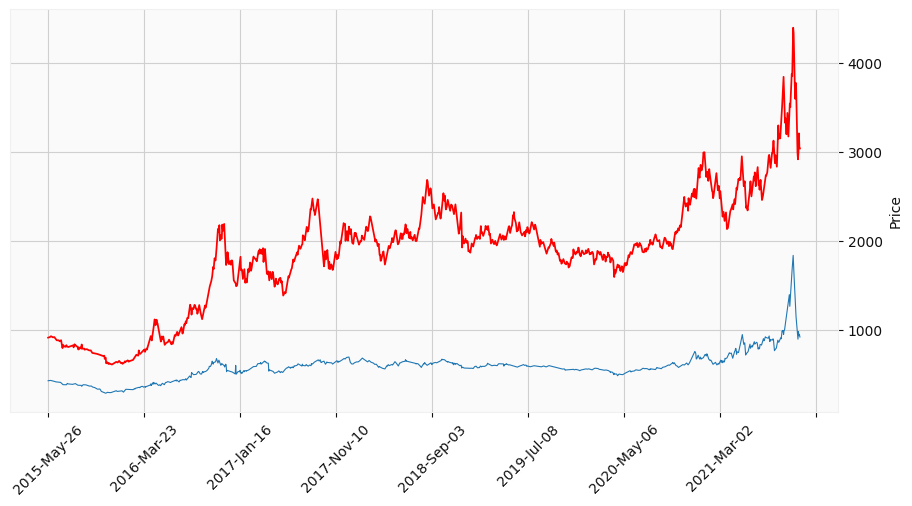

In [12]:
subfig = mpf.make_addplot(newjdf['open'],color='red')
mpf.plot(newzcdf,type='line',style='yahoo',addplot=subfig,figratio=(12,6),figscale=1,tight_layout=False)

[Text(0.5, 0, 'ZC'), Text(0, 0.5, 'J')]

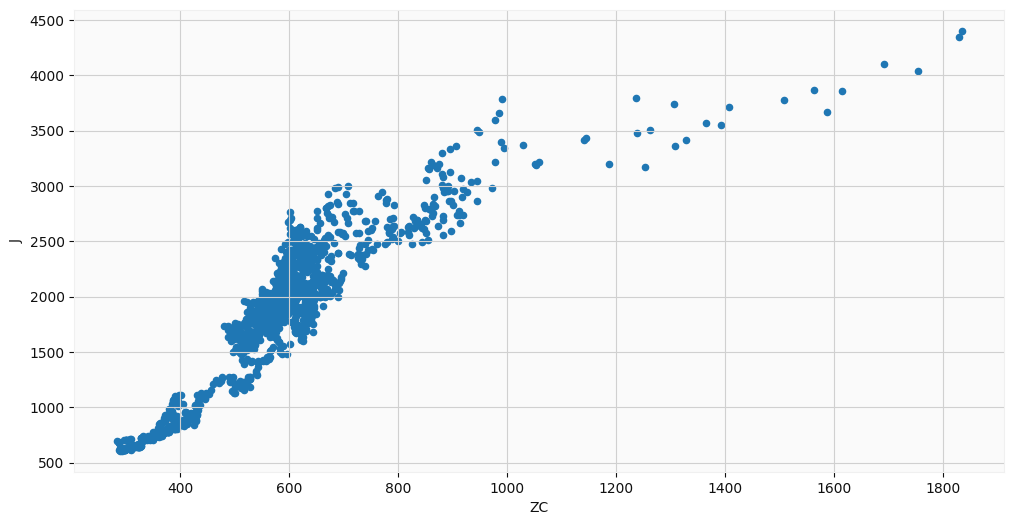

In [13]:
ax = newdf.plot(x='close_x',y='close_y',kind='scatter',figsize=(12,6))
ax.set(xlabel='ZC',ylabel='J')

In [80]:
adfreszc = sm.tsa.stattools.adfuller(newzcdf['close'])
print(f"统计量{adfreszc[0]:.3f}\n p值{adfreszc[1]:.3f}")
for key, val in adfreszc[4].items():
    print(f"{key}临界值{val:.3f}")

统计量-0.210
 p值0.937
1%临界值-3.435
5%临界值-2.863
10%临界值-2.568


- 接受原假设，zc价格序列是**非平稳**序列

- 继续检验一阶差分的平稳性

In [81]:
zcDiff = newzcdf['close'].diff()

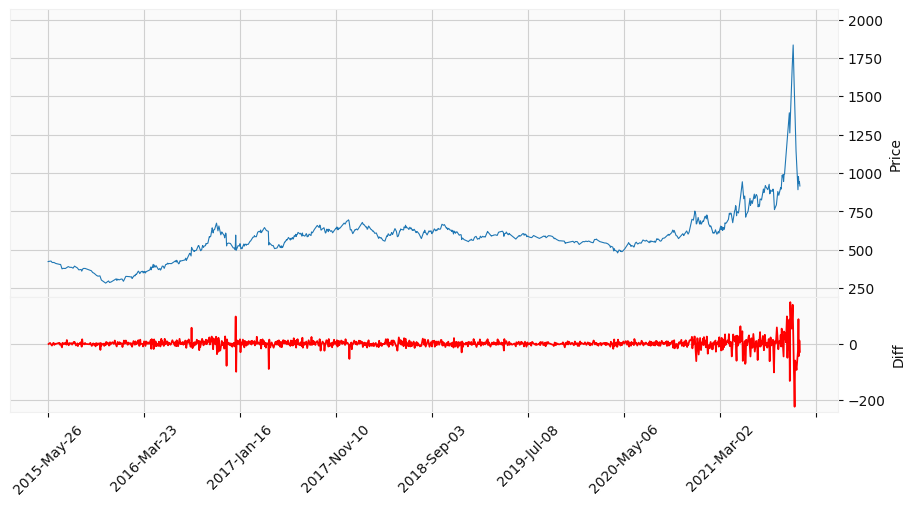

In [83]:
mpf.plot(newzcdf,type='line',style='yahoo',addplot=mpf.make_addplot(zcDiff,color='red',panel=1,ylabel='Diff'),figratio=(12,6),figscale=1)

In [84]:
adfresZcDiff = sm.tsa.stattools.adfuller(zcDiff[1:])
print(f"统计量{adfresZcDiff[0]:.3f}\n p值{adfresZcDiff[1]:.3f}")
for key, val in adfresZcDiff[4].items():
    print(f"{key}临界值{val:.3f}")

统计量-10.919
 p值0.000
1%临界值-3.435
5%临界值-2.863
10%临界值-2.568


- 在1%水平上拒绝原假设，即ZC价格序列的1阶差分是**平稳**序列

- ZC价格序列是**1阶单整**

In [85]:
adfresj = sm.tsa.stattools.adfuller(newjdf['close'])
print(f"统计量{adfresj[0]:.3f}\n p值{adfresj[1]:.3f}")
for key, val in adfresj[4].items():
    print(f"{key}临界值{val:.3f}")

统计量-0.953
 p值0.770
1%临界值-3.435
5%临界值-2.863
10%临界值-2.568


- 接受原假设，j价格序列是**非平稳**序列

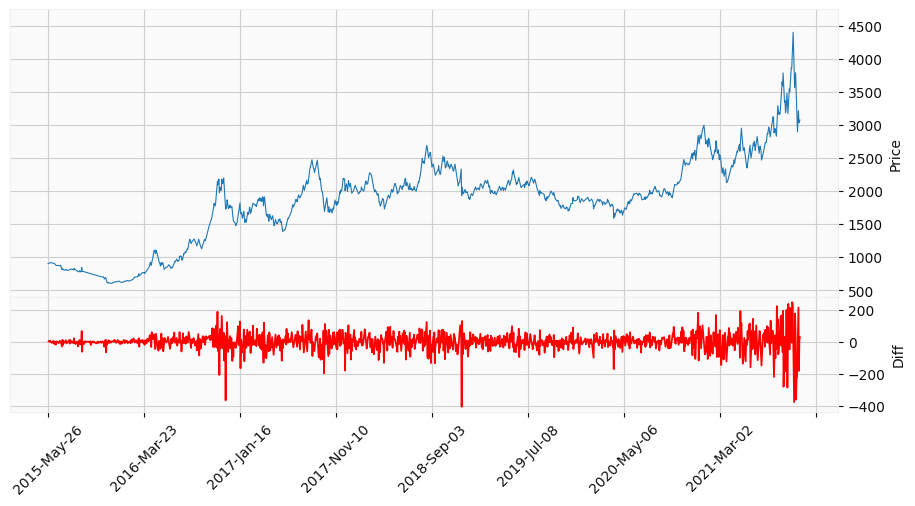

In [86]:
jDiff = newjdf['close'].diff()
mpf.plot(newjdf,type='line',style='yahoo',addplot=mpf.make_addplot(jDiff,color='red',panel=1,ylabel='Diff'),figratio=(12,6),figscale=1)

In [87]:
adfresJDiff = sm.tsa.stattools.adfuller(jDiff[1:])
print(f"统计量{adfresJDiff[0]:.3f}\n p值{adfresJDiff[1]:.3f}")
for key, val in adfresJDiff[4].items():
    print(f"{key}临界值{val:.3f}")

统计量-9.867
 p值0.000
1%临界值-3.435
5%临界值-2.863
10%临界值-2.568


- 在1%水平上拒绝原假设，即j价格序列的1阶差分是**平稳**序列

- j价格序列是**1阶单整**

#### 协整检验

```python
coint_t, pvalue, crit_value = sm.tsa.stattools.coint(y0, y1)
```
- `y0`与`y1`：需要检验的两个时间序列
- `coint_t`：对回归残差单位根检验的统计量
- `pvalue`：单位根检验的显著性水平
- `crit_value`：单位根检验分别在1%、5%、10%上的临界值，列表类型

- 原假设：**不存在**协整关系

In [88]:
coint_t,pvalue,crit_val = sm.tsa.stattools.coint(newzcdf['close'], newjdf['close'])
print(f"统计量 {coint_t:.3f}\n p值 {pvalue:.3f}\n 1%临界值 {crit_val[0]:.3f}\n 5%临界值 {crit_val[1]:.3f}\n 10%临界值 {crit_val[2]:.3f}")

统计量 -3.224
 p值 0.066
 1%临界值 -3.903
 5%临界值 -3.340
 10%临界值 -3.047


- 在10%的显著性水平上拒绝原假设，即两个价格序列之间**具有协整关系**

#### 计算协整方程

- 具有协整关系的两个时间序列，可以通过最小二乘线性回归构建协整方程

```python
    model = sm.OLS(y,X)
    result = model.fit()   #模型拟合
```
- `y`：被解释变量
- `X`：解释变量
- `model`：构建的最小二乘回归模型
- `result`：拟合结果

```python
    X = sm.add_constant(x)
```
- 增加截距项

In [96]:
x = np.log(newzcdf['close'])
y = np.log(newjdf['close'])

In [97]:
X = sm.add_constant(x)

In [98]:
model = sm.OLS(y,X)
result = model.fit()

In [99]:
result.summary()    # 显示回归结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 1.031e+04
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:27:44   Log-Likelihood:                 731.75
No. Observations:                1568   AIC:                            -1459.
Df Residuals:                    1566   BIC:                            -1449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9028      0.092    -20.642      0.000      -2.084      -1.722
close          1.4778      0.015    101.541      0.000       1.449       1.506
==============================================================================
Omnibus:                      301.847   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              820.319
Skew:                          -1.005   Prob(JB):                    7.41e-179
Kurtosis:                       5.918   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
result.params # 显示回归系数

const   -1.902800
close    1.477757
dtype: float64

#### 计算价格序列差

In [101]:
residual = y-result.params[1]*x
residual

日期
2015-05-26   -2.125046
2015-05-27   -2.116311
2015-05-28   -2.124442
2015-05-29   -2.125435
2015-06-01   -2.126280
                ...   
2021-11-02   -2.032058
2021-11-03   -2.099525
2021-11-04   -2.089913
2021-11-05   -2.103112
2021-11-08   -2.047425
Name: close, Length: 1568, dtype: float64

<AxesSubplot:xlabel='日期'>

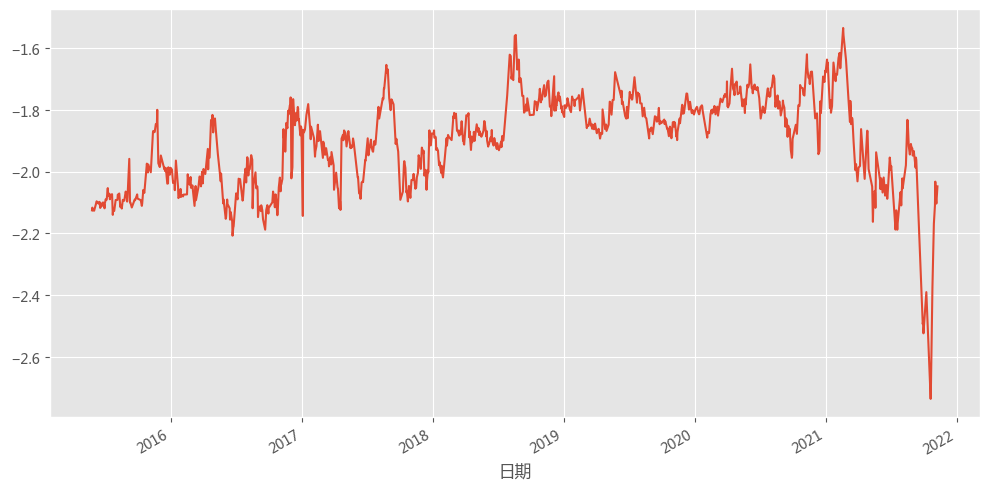

In [112]:
residual.plot(kind='line',figsize=(12,6))

In [103]:
# 价格序列差的均值
resMean = residual.mean()
print(f"价格序列差的均值{resMean:.3f}")

价格序列差的均值-1.903


In [104]:
# 价格序列差的标准差
resStd = residual.std()
print(f"价格序列差的标准差{resStd:.3f}")

价格序列差的标准差0.152


In [105]:
# 2倍标准差距离
dist = 1.2
resUpper = resMean+dist*resStd
resLower = resMean-dist*resStd
print(f"正{dist}倍标准差为{resUpper:.3f}，负{dist}倍标准差为{resLower:.3f}")

正1.2倍标准差为-1.721，负1.2倍标准差为-2.085


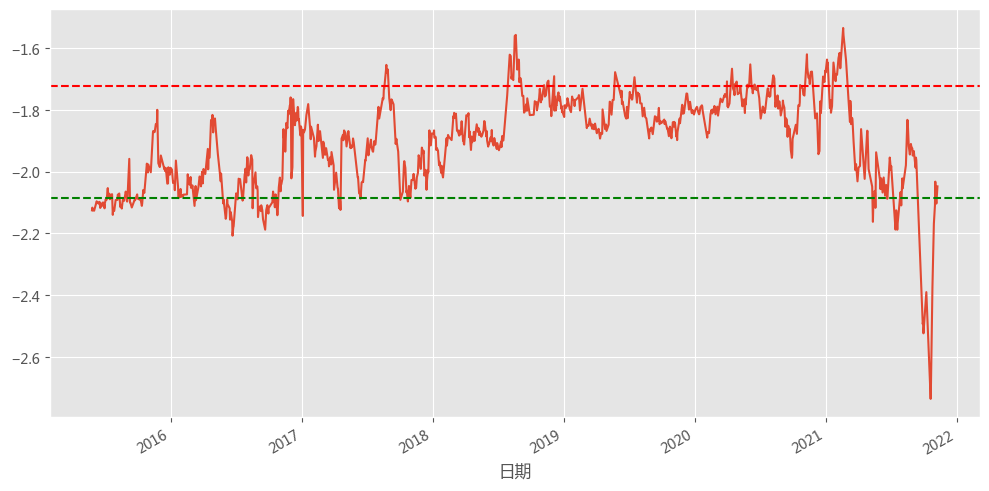

In [111]:
ax = residual.plot(kind='line',figsize=(12,6))
ax.axhline(resUpper,color='r',linestyle='--')
ax.axhline(resLower,color='g',linestyle='--')

#### 均值回归交易策略

- 选定一个时间窗口长度$d$，比如15天
- 每天计算$d$日的价格差序列$dif$
    $$ZC收盘价-协整方程的系数\times J收盘价$$
- 计算$dif$的均值与标准差，得到上下界
- 如果价格差超过**上界**，**做空**ZC，**做多**J
- 如果价格差跌破**下界**，**做多**ZC，**做空**J

### 卡尔曼滤波（Kalman filter）

#### 状态空间模型

- 假设$\theta_t$表示一组状态

- 状态更新方程
$$\theta_t=G_t\theta_{t-1}+w_t$$

$w_t$是一个白噪声，服从$N(0,Q)$，$G_t$系数矩阵

- 观测方程
$$ y_t = H_t\theta_t+v_t$$

$v_t$是一个白噪声，服从$N(0,R)$，$y_t$是观测变量

<center><img src="./img/models/kalman.png" width=100%></center>

##### 迭代步骤

- 利用状态更新方程更新 $\hat{\theta}_{t|t-1}$与其方差(或协方差矩阵)$\hat{Q}_{t|t-1}$

- 测量观测变量$y_t$与其方差$R_t$

- 计算卡尔曼增益$K_t$

- 利用下式计算$\hat{\theta}_{t|t}$

$$
    \hat{\theta}_{t|t}=\hat{\theta}_{t|t-1}+K_t(y_t-H\hat{\theta}_{t|t-1})
$$

- 计算$\hat{Q}_t$，即$\hat{\theta}_{t|t}$的方差或协方差矩阵

#### 利用卡尔曼滤波统计套利

- 两个金融产品的价格序列分别为$X(t)$和$Y(t)$

- 状态：$\beta(t)$

- 状态更新方程
$$
\beta(t)=\beta(t-1)+w_t\\
w_t\sim N(0,Q)
$$

- 观测方程
$$
Y(t)=\beta(t)X(t)+v_t\\
v_t\sim N(0,R)
$$

- 估计的$\beta(t)$

<center><img src="./img/models/betas.png" width=60%></center>

##### 注意事项

- $\frac{Q}{R}$应当小于一定的阈值

<center><img src="./img/models/qr.png" width=100%></center>

#### 卡尔曼滤波例子

In [45]:
obvMtx = np.transpose(np.vstack([newzcdf['close'].values,np.ones(newzcdf.shape[0])])).reshape(-1,1,2)
obvMtx

array([[[423.4,   1. ]],

       [[422. ,   1. ]],

       [[424.8,   1. ]],

       ...,

       [[934.4,   1. ]],

       [[945.2,   1. ]],

       [[916.2,   1. ]]])

In [54]:
kf = pkl.KalmanFilter(
    n_dim_obs=1,
    n_dim_state=2,
    initial_state_mean=np.ones(2),
    initial_state_covariance=np.ones((2,2)),
    transition_matrices=np.eye(2),
    observation_matrices=obvMtx,
    observation_covariance=1,
    transition_covariance=np.eye(2)*0.01
)

In [55]:
state_means, state_covs = kf.filter(newjdf['close'])                 # observes sym_b price

array([<AxesSubplot:xlabel='日期'>, <AxesSubplot:xlabel='日期'>], dtype=object)

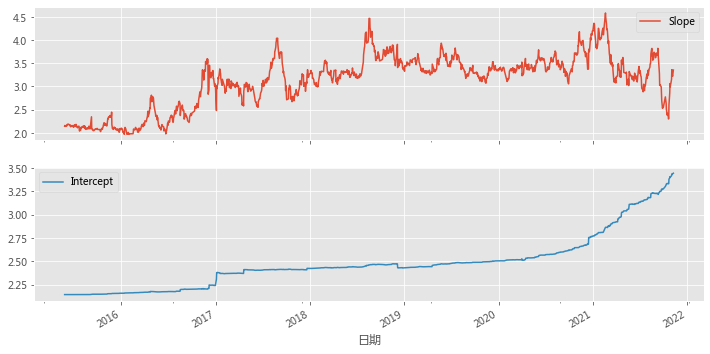

In [56]:
beta_kf = pd.DataFrame(state_means, columns=['Slope','Intercept'],index=newzcdf.index)
beta_kf.plot(subplots=True,figsize=(12,6))

### 更多参考文献

- Avellaneda, Marco and Lee, Jeong-Hyun. [Statistical arbitrage in the US equities market](https://math.cims.nyu.edu/faculty/avellane/AvellanedaLeeStatArb071108.pdf)[J]. Quantitative Finance, 2010, 10(7):761-782.[]
- Gatev E, Goetzmann W N, Rouwenhorst K G, et al. [Pairs Trading: Performance of a Relative Value Arbitrage Rule](http://stat.wharton.upenn.edu/~steele/Courses/434/434Context/PairsTrading/PairsTradingGGR.pdf)[J]. Review of Financial Studies, 2006, 19(3): 797-827.

## 多因子模型

<dl class="row">
    <dt class="col-md-4">多因子模型</dt>
    <dd class="col-md-8">利用<strong>多个</strong>对资产收益率（例如，股票、期货）有显著影响的<b>因子（factor）</b>建立的量化模型，以解释和预测均衡资产收益率的变化</dd>
</dl>

### 收益率

- 假设$P_t$是$t$时刻资产的价格，**单周期收益率**为
$$
    R_t = \frac{P_t-P_{t-1}}{P_{t-1}}
$$

- 对数收益率
$$
    r_t = \ln(\frac{P_t}{P_{t-1}})
$$

- 当$t$与$t-1$的间隔趋向0的时候，
$$
    r_t=\ln(\frac{P_t}{P_{t-1}})=\ln(1+R_t)\approx R_t
$$

### CAPM模型

\begin{equation}
  r_i=r_f+\beta_i\left(r_m-r_f\right)+\varepsilon_i
\end{equation}

- $\beta_i$：风险系数
- $r_i$：第$i$个资产的收益率
- $r_f$：无风险收益
- $r_m$：市场组合的收益率
- $\varepsilon_i$：误差

- 假设
    1. 所有投资者都希望获得最大收益
    2. 所有投资者在投资期内的预期收益服从**相同**的概率分布
    3. 所有投资者对风险都具有**相同**的偏好和估计
    4. 所有投资者都使用风险化收益模型进行投资
    5. 资者都具有**风险相同的情况下偏好高收益**，**收益相同的情况下偏好低风险**的投资风格

> 假设过于严格，尤其2-5与实际情况不符

### APT模型

- APT(Arbitrage Pricing Theory)套利定价理论

\begin{equation}
  r_i=\lambda_0+\beta_{i1}\times RP_1+\beta_{i2}\times RP_2+\cdots+\beta_{in}\times RP_n+\varepsilon_i
\end{equation}

- $\beta_{ij}$：资产$i$对第$j$个因素的敏感度
- $RP_j$：影响资产收益率的第$j$个因子

- CAPM模型是APT模型的特例，即单因子模型
    - $\lambda_0=r_f$
    - $RP_1=r_m-r_f$

- 相对于CAPM模型，APT模型
    - 不需要假设所有投资者对市场的预期一致
    - 没有假设市场是完全有效的，存在价格扭曲

- APT模型的局限
    - 不知道有多少个因子
    - 不知道哪些因子能够对资产收益率产生显著影响

- 如何获得因子？
    - 从经济学角度识别
    - 利用统计方法识别，例如主成分分析、因子分析

### Fama-French三因子模型

- 从经济学角度识别因子

\begin{equation}
  E(r_i)=r_f+\beta_1\left(r_m-r_f\right)+\beta_2SMB+\beta_3HML
\end{equation}

#### $SMB$

- Small Minus Big，市值因子

- 小市值（market captilization）公司的股票收益率会超过大市值公司的股票收益率

$$
    SMB = 小市值公司股票组合的收益率-大市值公司股票组合的收益率
$$

#### $HML$

- High Minus Low，账面市值比因子

$$
账面市值比=\frac{公司股东权益}{公司市值}
$$

- 高账面市值比（价值股）公司的股票收益率会超过低账面市值比（成长股）公司的股票收益率

$$
    HML= 高账面市值比公司股票组合的收益率-低账面市值比公司股票组合的收益率
$$

#### 计算SMB和HML

""|High(高账面市值比)|Middle(中间)|低(Low)
---|---|---|---
Small(小市值)|SH|SM|SL
Big(大市值)|BH|BM|BL

$$
SMB=\frac{1}{3}(SH+SM+SL)-\frac{1}{3}(BH+BM+BL)
$$

$$
HML=\frac{1}{2}(SH+BH)-\frac{1}{2}(SL+BL)
$$

##### 读入三因子

In [100]:
threeFct = pd.read_csv('./data/models/RESSET_ThreeFactors_DAILY.csv')
threeFct.head()
threeFct.tail()

,Exchflg,Mktflg,Date,Rmrf,Smb,Hml
0,0,A,1992-07-01,-0.0337,-0.0123,0.0373
1,0,A,1992-07-02,-0.0015,0.0109,0.0054
2,0,A,1992-07-03,0.0180,0.0034,-0.0142
3,0,A,1992-07-06,0.0008,-0.1811,-0.1275
4,0,A,1992-07-07,0.0071,-0.0043,-0.0468


,Exchflg,Mktflg,Date,Rmrf,Smb,Hml
6885,0,A,2020-09-24,-0.0203,-0.0075,0.0020
6886,0,A,2020-09-25,-0.0013,-0.0033,-0.0024
6887,0,A,2020-09-28,-0.0031,-0.0141,0.0028
6888,0,A,2020-09-29,0.0045,0.0013,-0.0063
6889,0,A,2020-09-30,-0.0009,-0.0017,-0.0045


变量名|含义
---|---
Exchflg|交易所标识
Mktflg|股票市场标识
Date|日期
Rmrf|市场溢酬因子
Smb|市值因子
Hml|账面市值比因子

In [105]:
threeFct.set_index('Date',inplace=True)
threeFct

,Exchflg,Mktflg,Rmrf,Smb,Hml
Date,,,,,
1992-07-01,0,A,-0.0337,-0.0123,0.0373
1992-07-02,0,A,-0.0015,0.0109,0.0054
1992-07-03,0,A,0.0180,0.0034,-0.0142
1992-07-06,0,A,0.0008,-0.1811,-0.1275
1992-07-07,0,A,0.0071,-0.0043,-0.0468
...,...,...,...,...,...
2020-09-24,0,A,-0.0203,-0.0075,0.0020
2020-09-25,0,A,-0.0013,-0.0033,-0.0024
2020-09-28,0,A,-0.0031,-0.0141,0.0028


##### 读入个股股价数据

In [106]:
stock1 = web.DataReader('000001.SZ','yahoo',start='1992-7-1',end='2020-9-30')
stock1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-06-18,5.50853,5.44705,5.47598,5.50130,54945796.0,4.868801
2012-06-19,5.55917,5.46513,5.47960,5.51577,41451153.0,4.881608
2012-06-20,5.60619,5.49768,5.54470,5.50853,39732147.0,4.875200
2012-06-21,5.50853,5.37471,5.50492,5.38918,40043416.0,4.769572
2012-06-25,5.44705,5.34216,5.38194,5.34216,45441793.0,4.727959
...,...,...,...,...,...,...
2020-09-24,15.61000,15.12000,15.59000,15.14000,104553645.0,15.140000
2020-09-25,15.31000,15.11000,15.20000,15.18000,60779133.0,15.180000
2020-09-28,15.37000,14.98000,15.19000,15.30000,60859711.0,15.300000


##### 将股价数据和三因子数据合并

In [113]:
stk1 = pd.merge(stock1,threeFct,left_index=True,right_index=True)
stk1

,High,Low,Open,Close,Volume,Adj Close,Exchflg,Mktflg,Rmrf,Smb,Hml
Date,,,,,,,,,,,
2012-06-18,5.50853,5.44705,5.47598,5.50130,54945796.0,4.868801,0,A,0.0053,0.0034,-0.0057
2012-06-19,5.55917,5.46513,5.47960,5.51577,41451153.0,4.881608,0,A,-0.0071,0.0030,-0.0009
2012-06-20,5.60619,5.49768,5.54470,5.50853,39732147.0,4.875200,0,A,-0.0013,-0.0014,0.0034
2012-06-21,5.50853,5.37471,5.50492,5.38918,40043416.0,4.769572,0,A,-0.0144,0.0013,0.0013
2012-06-25,5.44705,5.34216,5.38194,5.34216,45441793.0,4.727959,0,A,-0.0187,-0.0032,0.0053
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,15.61000,15.12000,15.59000,15.14000,104553645.0,15.140000,0,A,-0.0203,-0.0075,0.0020
2020-09-25,15.31000,15.11000,15.20000,15.18000,60779133.0,15.180000,0,A,-0.0013,-0.0033,-0.0024
2020-09-28,15.37000,14.98000,15.19000,15.30000,60859711.0,15.300000,0,A,-0.0031,-0.0141,0.0028


##### 计算每日收益率

In [116]:
stk1['ret'] = stk1['Close'].pct_change()
stk1

,High,Low,Open,Close,Volume,Adj Close,Exchflg,Mktflg,Rmrf,Smb,Hml,ret
Date,,,,,,,,,,,,
2012-06-18,5.50853,5.44705,5.47598,5.50130,54945796.0,4.868801,0,A,0.0053,0.0034,-0.0057,NaN
2012-06-19,5.55917,5.46513,5.47960,5.51577,41451153.0,4.881608,0,A,-0.0071,0.0030,-0.0009,0.002630
2012-06-20,5.60619,5.49768,5.54470,5.50853,39732147.0,4.875200,0,A,-0.0013,-0.0014,0.0034,-0.001313
2012-06-21,5.50853,5.37471,5.50492,5.38918,40043416.0,4.769572,0,A,-0.0144,0.0013,0.0013,-0.021666
2012-06-25,5.44705,5.34216,5.38194,5.34216,45441793.0,4.727959,0,A,-0.0187,-0.0032,0.0053,-0.008725
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,15.61000,15.12000,15.59000,15.14000,104553645.0,15.140000,0,A,-0.0203,-0.0075,0.0020,-0.031969
2020-09-25,15.31000,15.11000,15.20000,15.18000,60779133.0,15.180000,0,A,-0.0013,-0.0033,-0.0024,0.002642
2020-09-28,15.37000,14.98000,15.19000,15.30000,60859711.0,15.300000,0,A,-0.0031,-0.0141,0.0028,0.007905


In [118]:
stk1.dropna(how='any',inplace=True)
stk1

,High,Low,Open,Close,Volume,Adj Close,Exchflg,Mktflg,Rmrf,Smb,Hml,ret
Date,,,,,,,,,,,,
2012-06-19,5.55917,5.46513,5.47960,5.51577,41451153.0,4.881608,0,A,-0.0071,0.0030,-0.0009,0.002630
2012-06-20,5.60619,5.49768,5.54470,5.50853,39732147.0,4.875200,0,A,-0.0013,-0.0014,0.0034,-0.001313
2012-06-21,5.50853,5.37471,5.50492,5.38918,40043416.0,4.769572,0,A,-0.0144,0.0013,0.0013,-0.021666
2012-06-25,5.44705,5.34216,5.38194,5.34216,45441793.0,4.727959,0,A,-0.0187,-0.0032,0.0053,-0.008725
2012-06-26,5.42896,5.34939,5.35663,5.38918,37303685.0,4.769572,0,A,-0.0005,0.0012,0.0006,0.008802
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,15.61000,15.12000,15.59000,15.14000,104553645.0,15.140000,0,A,-0.0203,-0.0075,0.0020,-0.031969
2020-09-25,15.31000,15.11000,15.20000,15.18000,60779133.0,15.180000,0,A,-0.0013,-0.0033,-0.0024,0.002642
2020-09-28,15.37000,14.98000,15.19000,15.30000,60859711.0,15.300000,0,A,-0.0031,-0.0141,0.0028,0.007905


##### 股票每日收益率对三因子回归

In [120]:
stk1Fct = sm.add_constant(stk1[['Rmrf','Smb','Hml']])
stk1RegModel = sm.OLS(stk1['ret'],stk1Fct)
stk1RegRes = stk1RegModel.fit()
stk1RegRes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     776.0
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:54:13   Log-Likelihood:                 5627.1
No. Observations:                2017   AIC:                        -1.125e+04
Df Residuals:                    2013   BIC:                        -1.122e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      1.990      0.047     9.6e-06       0.001
Rmrf           1.0581      0.022     47.034      0.000       1.014       1.102
Smb           -0.6830      0.052    -13.248      0.000      -0.784      -0.582
Hml            0.5485      0.063      8.652      0.000       0.424       0.673
==============================================================================
Omnibus:                      419.895   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1875.321
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                       7.343   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- `Rmrf`、`Smb`、`Hml`的**系数**称为`00001.SZ`股票在三个因子上的**风险暴露**
- 截距成为`000001.SZ`股票的$\alpha$值

### Fama-French五因子模型

\begin{equation}
  E(r_i)=r_f+\beta_1\left(r_m-r_f\right)+\beta_2SMB+\beta_3HML+\beta_4RMW+\beta_5CMA
\end{equation}

#### RMW

- Robust minus weak，盈利水平因子

$$
RMW=高盈利水平公司股票组合的收益-低盈利水平公司股票组合的收益
$$

#### CMA

- Conservative minus aggressive，投资水平因子

$$
CMA=低投资水平公司股票组合的收益-高投资水平公司股票组合的收益
$$

### 因子模型策略设计

#### 候选因子与因子的分类

- 候选因子越全面越好

##### 股票交易相关因子

###### 价值因子

- 对应价值型投资，买入便宜的资产长期持有以获得超额收益

- 典型指标
    - 盈利收益率，$E/P$
    - 市净率

###### 成长因子

- 对应成长型投资，依据资产的历史增长水平对未来预测

- 典型指标
    - 净资产收益率（ROE）
    - 总资产收益率（ROA）
    - 主营收入增长率
    - 市盈率相对盈利增长比例，$PEG=\frac{PE}{年盈利增长率}$

###### 品质因子

- 持有高品质的资产，风险较低，较好保护投资者利益

- 典型指标
    - 资产负债率
    - 固定资产比例

##### 期货交易相关因子

<center><img src="./img/models/futureMultiFactors.png" width=100%></center>

- 近月收益率：近月合约的对数收益率，衡量捕捉当前价格波动的收益
- 持有收益率：远月合约的对数收益率，衡量捕捉长期持有的收益

###### 动量因子（momentum factor）

- 原理：过去上涨良好的商品未来还会上涨；过去下跌的商品未来还会下跌

- 因子构成
    - 商品的超额收益在过去12个月内的均值

###### 期限结构因子（term structure）

- 原理：存储理论（the theory of storage），该理论将期限结构与库存水平以及持有实物商品的的成本与收益联系起来

- 持有稀缺的商品，卖出供应充足的商品

- 因子构成
    $$\ln(f_{t,Front})-\ln(f_{t,Second})$$
    
    - 其中，$\ln(f_{t,Front})为准备建立仓位时候的近月合约价格对数$

###### 波动率因子（volatility factor）

- 原理：价格波动性高的商品对外来的冲击更为敏感，但同时，也对跨期风险的承受能力弱，因此，持有这类商品的投资者会要求一个更高的回报

- 因子构成：变异系数
\begin{align}
  &\frac{\sigma^2}{|\mu|}\\
  &\sigma^2=\frac{1}{D-1}\sum_{d=1}^D(r_{d,Front}-\mu)^2\\
  &\mu = \frac{1}{D}\sum_{d=1}^Dr_{d,Front}
\end{align}

###### 价值因子（value factor）

- 原理：投资者的有限理性偏差导致价格出现异动，但是之后价格会向平均水平回归

- 长期盈利的商品在未来价格会下跌；长期低迷的商品在未来价格会上涨

- 因子构成

\begin{equation}
  \ln\frac{\frac{1}{D}\sum_{d=1}^D f_{d,Front}}{f_{t,Front}}
\end{equation}

###### 流动性因子（liquidity factor）

- 原理：持有流动性低的商品的投资者要求一个更高的期望回报

- 因子构成
\begin{equation}
  LR=\frac{1}{D}\sum_{d=1}^D\frac{Volume_d}{|r_d|}
\end{equation}

###### 汇率因子

- 原理：美元币值与商品价格呈现负相关关系

- 因子构成
    - $期货的月收益率=\beta\times 美元对主要货币的汇率变动+\varepsilon$

- 对于美元$\beta$系数更小的商品，投资者会要求一个更高的回报

###### 通胀因子

- 原理：商品是对通胀的对冲

- 因子构成
    - $期货的月收益率=\beta\times 通胀率的变动+\varepsilon$

- 对于通胀$\beta$系数更大的商品，投资者会要求一个更高的回报

#### 有效因子识别

- 能够将公司股票收益率高低明显区别出来的因子

- 方法：两阶段回归方法，假设有$n$个股票、$T$个周期、$k$个因子 

1. 对于每个股票在时间序列上进行回归
$$
    r_{it}=a_i+\beta_{i1}RP_{1t}+\beta_{i2}RP_{2t}+\cdots+\beta_{ik}RP_{kt}+\varepsilon_{it}, t= 1,2,\cdots,T, i=1,2,\cdots,n
$$
    - $\beta_{ik}$：股票$i$在因子$RP_k$上的风险暴露

2. 截面回归
$$
    E[r_{it}]=\alpha+\lambda_1\hat{\beta}_{i1}+\lambda_2\hat{\beta}_{i2}+\cdots+\lambda_k\hat{\beta}_{ik}+\eta_i, i=1,2,\cdots,n
$$
    - $E[r_{it}]$：股票$i$的收益率在$T$周期内的均值
    - $\lambda_k$：因子$RP_k$对个股收益率的影响作用
    - 根据$\lambda_k$大小确定因子

![](img/strategy/factorModelEq1.png)

![](img/strategy/factorModelEq2.png)

![](img/strategy/factorModelEq3.png)

#### Fama-MacBeth方法

- 对每个周期$t$，进行截面回归
$$
r_{it}=\alpha_{it}+\lambda_{1t}\hat{\beta}_{i1}+\cdots+\lambda_{kt}\hat{\beta}_{ik}\\
i=1,2,\cdots,n
$$

- 估计因子收益率与定价误差
$$
\lambda_i = \frac{1}{T}\sum_{t=1}^T\hat{\lambda}_{it}\\
\alpha_i =\frac{1}{T}\sum_{t=1}^T\hat{\alpha}_{it}
$$

#### 计算因子得分

- 针对每个筛选出来的因子，将所有股票在该因子上的风险暴露按照从大到小排序打分
- 对每个因子设置一个权重
- 计算每个股票在所有筛选出来的因子上得分的加权和，即每个股票的因子得分

#### 选股策略

- 设定一个调整股票池的时间频率
- 计算过去$T$个周期内，各个股票在因子上的风险暴露，加权得到因子得分
- 将因子得分按照从大到小排序，选出前$m$个股票进入股票池，原先股票池中的股票因子得分较低的，剔出股票池